[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.353287   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.803986   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.903839   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.333298   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.284637   

              Volume  
Date                  
2023-12-22  37122800  
2023-12-26  28919300  
2023-12-27  48087700  
2023-12-28  34049900  
2023-12-29  42628800  
              Open         High          Low        Close    Adj Close  \
count  6037.000000  6037.000000  6037.000000  6037.000000  6037.000000   
mean     35.836839    36.227569    35.461397    35.861158    34.509795   
std      51.002750    51.568311    50.478962    51.050850    50.786127   
min       0.231964     0

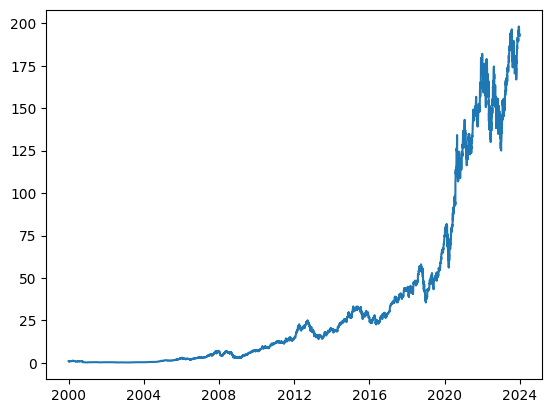

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("AAPL", start='2000-01-03', end='2023-12-30')

print(df.tail())
print(df.describe())

plt.plot(df['Close'])

[*********************100%%**********************]  3 of 3 completed

Ticker          AAPL        FE        WMT
Date                                     
2000-01-03  0.846127  7.440518  14.419449
2000-01-04  0.774790  7.440518  13.879903
2000-01-05  0.786128  7.714537  13.596642
2000-01-06  0.718097  7.735610  13.745021
2000-01-07  0.752113  7.777769  14.783649
Ticker            AAPL         FE        WMT
Date                                        
2023-12-22  193.353287  35.819885  51.859924
2023-12-26  192.803986  35.928642  51.780468
2023-12-27  192.903839  35.908867  52.267120
2023-12-28  193.333298  36.175812  52.164497
2023-12-29  192.284637  36.245018  52.190979
Ticker         AAPL           FE          WMT
count   6037.000000  6037.000000  6037.000000
mean      34.509795    24.472175    21.106066
std       50.786127     8.310898    12.374883
min        0.198346     6.235913     9.366562
25%        1.837121    19.758528    11.832490
50%       12.349165    24.212021    15.025215
75%       39.221977    30.020042    25.846243
max      197.857529    

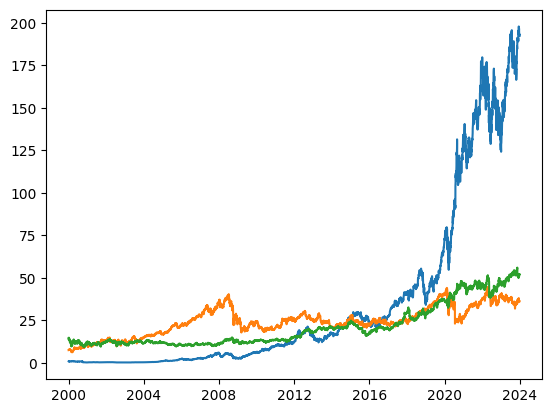

In [5]:
stocks = ['AAPL', 'FE', 'WMT']

stock_prices = yf.download(stocks, start='2000-01-03', end='2023-12-30')['Adj Close']

print(stock_prices.head())
print(stock_prices.tail())
print(stock_prices.describe())

plt.plot(stock_prices)

Ticker          AAPL        FE       WMT
Date                                    
2000-01-04  0.915690  1.000000  0.962582
2000-01-05  0.929089  1.036828  0.942938
2000-01-06  0.848687  1.039660  0.953228
2000-01-07  0.888889  1.045326  1.025258
2000-01-10  0.873255  1.048159  1.006548
Ticker          AAPL        FE       WMT
Date                                    
2000-01-04 -0.084310  0.000000 -0.037418
2000-01-05  0.014633  0.036828 -0.020408
2000-01-06 -0.086538  0.002732  0.010913
2000-01-07  0.047369  0.005450  0.075564
2000-01-10 -0.017588  0.002709 -0.018249
Ticker
AAPL    7.352463
FE      2.389604
WMT     1.949258
dtype: float64


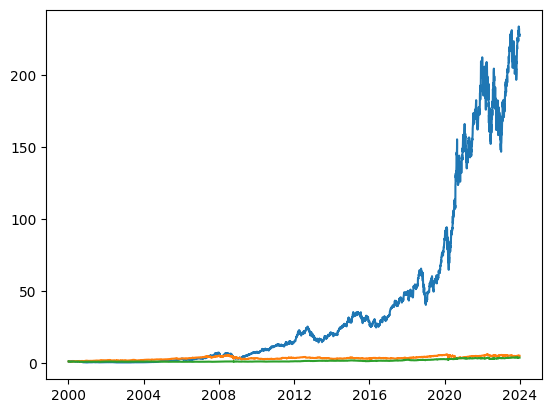

In [6]:
stock_returns = stock_prices.pct_change().dropna()
stock_returns_cumulative = (1 + stock_returns).cumprod()

print(stock_returns_cumulative.head())
print(stock_returns.head())
print(stock_returns.sum())
plt.plot(stock_returns_cumulative)



In [9]:
# Get risk free rate - T-Bills
import pandas_datareader as pdr
 
rf = pdr.DataReader('TB3MS', 'fred', start='2000-01-01', end='2023-12-30')
# Result as %, so 5% is represented as 5
print(rf.head())

# SPY as market proxy
mkt_prices = yf.download('SPY', start='2000-01-03', end='2023-12-30')['Adj Close']
print(mkt_prices.head())

[*********************100%%**********************]  1 of 1 completed

            TB3MS
DATE             
2000-01-01   5.32
2000-02-01   5.55
2000-03-01   5.69
2000-04-01   5.66
2000-05-01   5.79
Date
2000-01-03    93.591148
2000-01-04    89.931107
2000-01-05    90.092087
2000-01-06    88.644127
2000-01-07    93.792244
Name: Adj Close, dtype: float64
